In [103]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

def cont_dist(dist=None,pvalue=None,x=None,print_out=True, plot_out=False,
              plot_tail=0.001, **kwargs):
            
    def process(rv,pvalue,x,print_out):
        res=dict()

        mean, var, skew, kurt = rv.stats(moments='mvsk')
        stdev=var**.5
        res["mean"],res["var"],res["skew"],res["kurt"],res["stdev"] = \
            mean, var, skew, kurt, stdev

        if print_out:
            print("mean = %.2f\tvariance = %.2f\tstdev=%.2f"%(mean,var,stdev))
            print("skewness coefficient = %.2f\tkurtosis coefficient = %.2f"%(skew,kurt))
        
        if not x is None:
            res["px"]=rv.pdf(x)
            res["left_acc_p"]=rv.cdf(x)
            res["right_acc_p"]=1-rv.cdf(x)
            if res["left_acc_p"]<res["right_acc_p"]:
                right_acc_p,right_x=res["left_acc_p"],rv.ppf(1-res["left_acc_p"])
                left_acc_p,left_x=res["left_acc_p"],x
            else:
                left_acc_p,left_x=res["right_acc_p"],rv.ppf(res["right_acc_p"])
                right_acc_p,right_x=res["right_acc_p"],x
            res["equal_tail"]={
                "x_left":left_x,"x_right":right_x,
                "acc_p_left":left_acc_p, "acc_p_right":right_acc_p
            }

            if print_out:
                print("PDF at x = %.3f is %.3f."%(x,res["px"]))
                print("Left tail till x acc. prob. is %.3f."%res["left_acc_p"])
                print("Right tail from x acc. prob. is %.3f."%res["right_acc_p"])
                print("Equal tail at two sides \nLeft at %.3f, acc. prob is %.3f."%(
                        left_x,left_acc_p))
                print("Right at %.3f, acc. prob is %.3f."%(right_x,right_acc_p))

        elif not pvalue is None:
            res["left_acc_p"],res["x_left"]=pvalue, rv.ppf(pvalue)
            res["right_acc_p"],res["x_right"]=pvalue,rv.ppf(1-pvalue)
            left_acc_p,left_x=pvalue/2,rv.ppf(pvalue/2)
            right_acc_p,right_x=pvalue/2,rv.ppf(1-pvalue/2)
            res["equal_tail"]={
                "x_left":left_x,"x_right":right_x,
                "acc_p_left":left_acc_p, "acc_p_right":right_acc_p
            }

            if print_out:
                print("P value = %.3f"%pvalue)
                print("Left tail till x = %.3f having p = %.3f."%
                      (res["x_left"],res["left_acc_p"]))
                print("Right tail from x = %.3f having p = %.3f."%
                      (res["x_right"],res["right_acc_p"]))
                print("Equal tail at two sides \nLeft at %.3f, acc. prob is %.3f."%(
                        left_x,left_acc_p))
                print("Right at %.3f, acc. prob is %.3f."%(right_x,right_acc_p))
        
        if plot_out:
            _,ax=plt.subplots(1, 1)
            x = np.linspace(rv.ppf(plot_tail),rv.ppf(1-plot_tail),200)
            ax.plot(x, rv.pdf(x))
            ax.set_ylim(bottom=0)
            if "equal_tail" in res:
                x=res["equal_tail"]["x_left"]
                ax.vlines(x, 0, rv.pdf(x),colors='r', linestyles='dashed',
                          label="Equal Tail")
                x=res["equal_tail"]["x_right"]
                ax.vlines(x, 0, rv.pdf(x),colors='r', linestyles='dashed')
                if "x_left" in res:
                    x=res["x_left"]
                    ax.vlines(x, 0, rv.pdf(x),colors='g', linestyles='dotted',
                             label="Left Tail")
                    x=res["x_right"]
                    ax.vlines(x, 0, rv.pdf(x),colors='k', linestyles='dotted',
                             label="Right Tail")
                ax.legend(loc='best', frameon=False)
                
            plt.show()
  
        return res
  
    dist_s=dist.lower()[:3]

    if dist_s=="nor":
        return process(stats.norm(kwargs["mean"],kwargs["stdev"]),
                      pvalue,x,print_out)
    if dist_s=="chi":
        return process(stats.chi2(kwargs["df"]),
                      pvalue,x,print_out)
    if dist_s=="f":
        return process(stats.f(kwargs["dfn"],kwargs["dfd"]),
                      pvalue,x,print_out)
    if dist.lower()[:4]=="logn":
        return process(stats.lognorm(kwargs["s"]),
                      pvalue,x,print_out)
    if dist_s=="t":
        return process(stats.t(kwargs["df"]),
                      pvalue,x,print_out)

mean = 4.00	variance = 9.00	stdev=3.00
skewness coefficient = 0.00	kurtosis coefficient = 0.00
P value = 0.050
Left tail till x = -0.935 having p = 0.050.
Right tail from x = 8.935 having p = 0.050.
Equal tail at two sides 
Left at -1.880, acc. prob is 0.025.
Right at 9.880, acc. prob is 0.025.


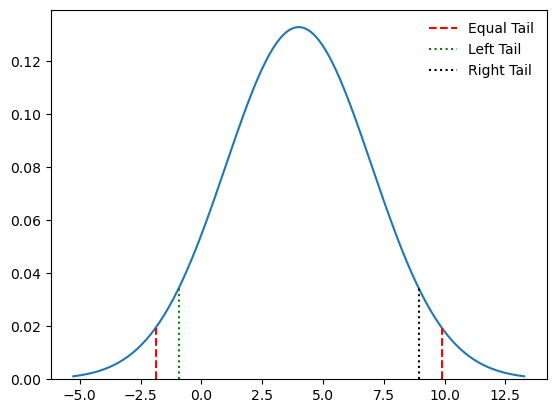

{'mean': 4.0,
 'var': 9.0,
 'skew': 0.0,
 'kurt': 0.0,
 'stdev': 3.0,
 'left_acc_p': 0.05,
 'x_left': -0.9345608808544181,
 'right_acc_p': 0.05,
 'x_right': 8.934560880854416,
 'equal_tail': {'x_left': -1.879891953620163,
  'x_right': 9.879891953620163,
  'acc_p_left': 0.025,
  'acc_p_right': 0.025}}

In [104]:
cont_dist(dist="normal",mean=4,stdev=3,pvalue=.05,plot_out=True)

mean = 4.00	variance = 9.00	stdev=3.00
skewness coefficient = 0.00	kurtosis coefficient = 0.00
PDF at x = 9.000 is 0.033.
Left tail till x acc. prob. is 0.952.
Right tail from x acc. prob. is 0.048.
Equal tail at two sides 
Left at -1.000, acc. prob is 0.048.
Right at 9.000, acc. prob is 0.048.


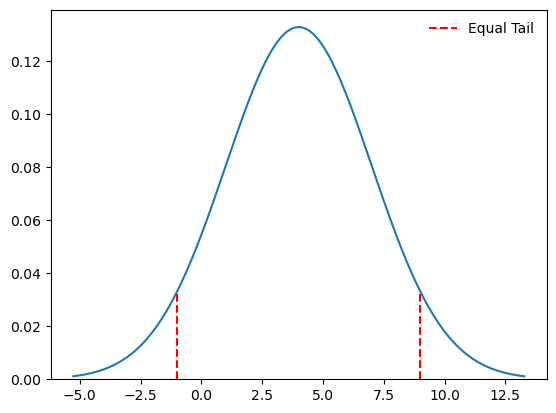

{'mean': 4.0,
 'var': 9.0,
 'skew': 0.0,
 'kurt': 0.0,
 'stdev': 3.0,
 'px': 0.03315904626424956,
 'left_acc_p': 0.9522096477271853,
 'right_acc_p': 0.047790352272814696,
 'equal_tail': {'x_left': -1.0000000000000018,
  'x_right': 9,
  'acc_p_left': 0.047790352272814696,
  'acc_p_right': 0.047790352272814696}}

In [105]:
cont_dist(dist="normal",mean=4,stdev=3,x=9,plot_out=True)

mean = 4.00	variance = 8.00	stdev=2.83
skewness coefficient = 1.41	kurtosis coefficient = 3.00
PDF at x = 9.000 is 0.025.
Left tail till x acc. prob. is 0.939.
Right tail from x acc. prob. is 0.061.
Equal tail at two sides 
Left at 0.797, acc. prob is 0.061.
Right at 9.000, acc. prob is 0.061.


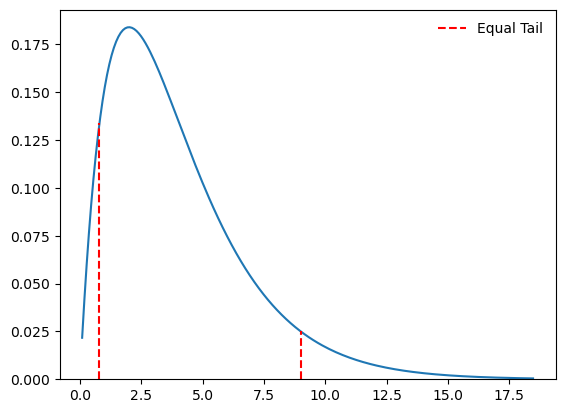

{'mean': 4.0,
 'var': 8.0,
 'skew': 1.4142135623730951,
 'kurt': 3.0,
 'stdev': 2.8284271247461903,
 'px': 0.0249952422110452,
 'left_acc_p': 0.9389005190396673,
 'right_acc_p': 0.061099480960332686,
 'equal_tail': {'x_left': 0.7966207967760608,
  'x_right': 9,
  'acc_p_left': 0.061099480960332686,
  'acc_p_right': 0.061099480960332686}}

In [106]:
cont_dist(dist="chi2",df=4,x=9,plot_out=True)

mean = 4.00	variance = 8.00	stdev=2.83
skewness coefficient = 1.41	kurtosis coefficient = 3.00
P value = 0.050
Left tail till x = 0.711 having p = 0.050.
Right tail from x = 9.488 having p = 0.050.
Equal tail at two sides 
Left at 0.484, acc. prob is 0.025.
Right at 11.143, acc. prob is 0.025.


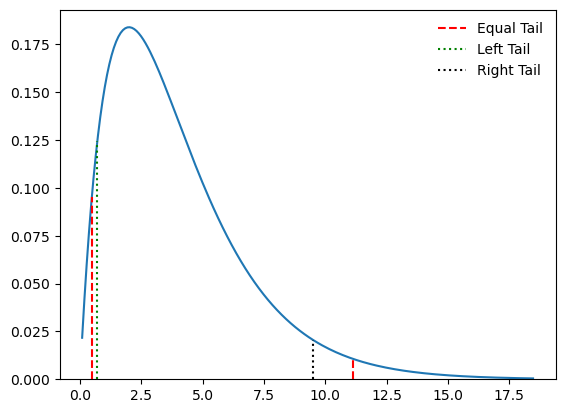

{'mean': 4.0,
 'var': 8.0,
 'skew': 1.4142135623730951,
 'kurt': 3.0,
 'stdev': 2.8284271247461903,
 'left_acc_p': 0.05,
 'x_left': 0.7107230213973239,
 'right_acc_p': 0.05,
 'x_right': 9.487729036781154,
 'equal_tail': {'x_left': 0.4844185570879299,
  'x_right': 11.143286781877796,
  'acc_p_left': 0.025,
  'acc_p_right': 0.025}}

In [107]:
cont_dist(dist="chi2",df=4,pvalue=.05,plot_out=True)

mean = 1.12	variance = 0.28	stdev=0.53
skewness coefficient = 1.81	kurtosis coefficient = 7.07
P value = 0.050
Left tail till x = 0.507 having p = 0.050.
Right tail from x = 2.113 having p = 0.050.
Equal tail at two sides 
Left at 0.444, acc. prob is 0.025.
Right at 2.453, acc. prob is 0.025.


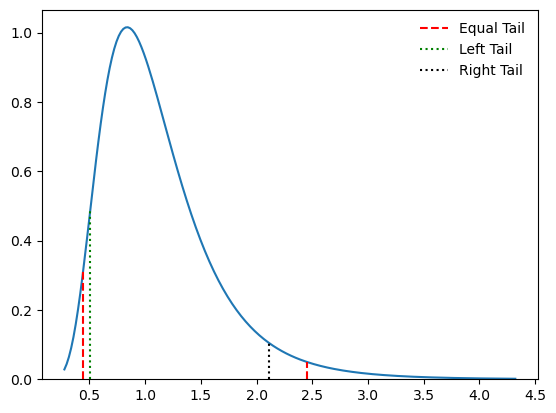

{'mean': 1.125,
 'var': 0.2805572660098522,
 'skew': 1.8065676503195025,
 'kurt': 7.074636015325671,
 'stdev': 0.5296765673596031,
 'left_acc_p': 0.05,
 'x_left': 0.5068510265949738,
 'right_acc_p': 0.05,
 'x_right': 2.1131065965798705,
 'equal_tail': {'x_left': 0.4442032125917732,
  'x_right': 2.452651390584542,
  'acc_p_left': 0.025,
  'acc_p_right': 0.025}}

In [108]:
cont_dist(dist="F",dfn=29,dfd=18,pvalue=.05,plot_out=True)

mean = 1.12	variance = 0.28	stdev=0.53
skewness coefficient = 1.81	kurtosis coefficient = 7.07
PDF at x = 3.000 is 0.016.
Left tail till x acc. prob. is 0.991.
Right tail from x acc. prob. is 0.009.
Equal tail at two sides 
Left at 0.373, acc. prob is 0.009.
Right at 3.000, acc. prob is 0.009.


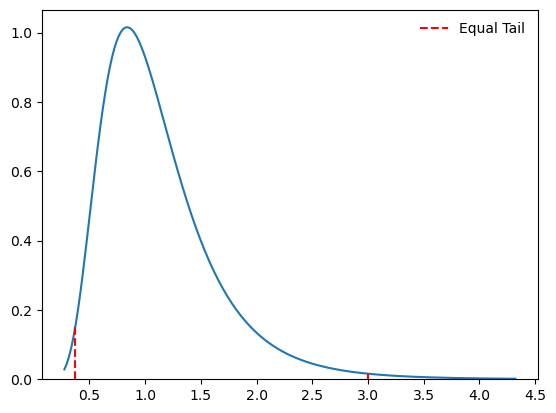

{'mean': 1.125,
 'var': 0.2805572660098522,
 'skew': 1.8065676503195025,
 'kurt': 7.074636015325671,
 'stdev': 0.5296765673596031,
 'px': 0.01605810431297055,
 'left_acc_p': 0.9912108253294075,
 'right_acc_p': 0.008789174670592481,
 'equal_tail': {'x_left': 0.37321837959938436,
  'x_right': 3,
  'acc_p_left': 0.008789174670592481,
  'acc_p_right': 0.008789174670592481}}

In [109]:
cont_dist(dist="F",dfn=29,dfd=18,x=3,plot_out=True)

mean = 1.58	variance = 3.69	stdev=1.92
skewness coefficient = 5.46	kurtosis coefficient = 81.31
P value = 0.050
Left tail till x = 0.208 having p = 0.050.
Right tail from x = 4.803 having p = 0.050.
Equal tail at two sides 
Left at 0.154, acc. prob is 0.025.
Right at 6.487, acc. prob is 0.025.


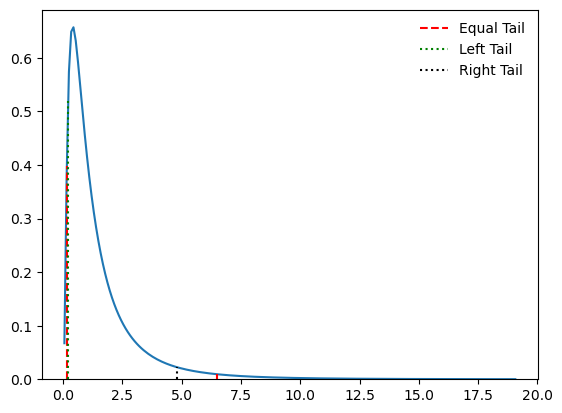

{'mean': 1.576264803741382,
 'var': 3.6886797556399684,
 'skew': 5.464256148333118,
 'kurt': 81.30583448651502,
 'stdev': 1.920593594605576,
 'left_acc_p': 0.05,
 'x_left': 0.20821369224218153,
 'right_acc_p': 0.05,
 'x_right': 4.802758114662604,
 'equal_tail': {'x_left': 0.15415362000842464,
  'x_right': 6.487035464657584,
  'acc_p_left': 0.025,
  'acc_p_right': 0.025}}

In [110]:
cont_dist(dist="lognormal",s=.954,pvalue=.05,plot_out=True)

mean = 0.00	variance = 3.70	stdev=1.92
skewness coefficient = nan	kurtosis coefficient = inf
P value = 0.050
Left tail till x = -2.447 having p = 0.050.
Right tail from x = 2.447 having p = 0.050.
Equal tail at two sides 
Left at -3.360, acc. prob is 0.025.
Right at 3.360, acc. prob is 0.025.


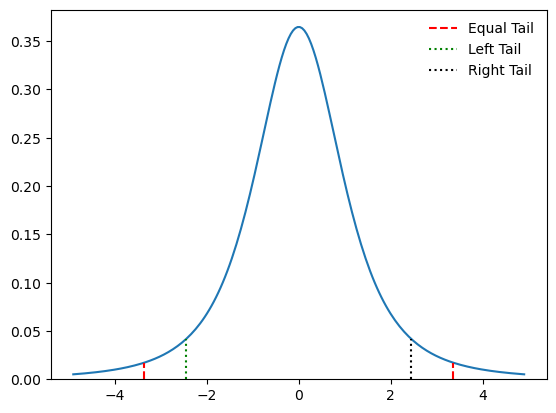

{'mean': 0.0,
 'var': 3.7027027027027017,
 'skew': nan,
 'kurt': inf,
 'stdev': 1.924240812035412,
 'left_acc_p': 0.05,
 'x_left': -2.447254182126518,
 'right_acc_p': 0.05,
 'x_right': 2.447254182126517,
 'equal_tail': {'x_left': -3.360297083343786,
  'x_right': 3.3602970833437853,
  'acc_p_left': 0.025,
  'acc_p_right': 0.025}}

In [112]:
cont_dist(dist="t",df=2.74,pvalue=.05,plot_out=True,plot_tail=0.01)